In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv("Ad_Click_Data.csv")

In [80]:
df.head(4)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [82]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


#### Key Highlights
Shape of the data is 1000 * 10 \
contains 1000 rows and 10 columns \
__Daily Time Spent on Site__ :  users spend 32 minutes to 92 minutes daily on ads. Mean of the daily time spend is close to 65 min which tells us that the ads are quite popular. \
__Age__ : Age of users varies from 19years to 61 years, indicates that all the users are adults. \
__Area Income__ : Income of all users is greater than 13k and the highest is 79k that means all the users has decent income and belong to different earning classes. \
__Daily Internet Usage__ : The minimum daily internet usage is 104 min and highest is 267 min. \
__Male__ : out of 997 users, 48% are male. So, we have more females users more than male users.


### Missing Values Anlaysis

In [83]:
Missing_value_Analysis=pd.DataFrame(df.isnull().sum()/df.shape[0])*100
Missing_value_Analysis.rename(columns={0:"Missing_Value_Percentage"},inplace=True)
Missing_value_Analysis.index.names=["Feature Columns"]


In [84]:
Missing_value_Analysis

,Missing_Value_Percentage
Feature Columns,
Daily Time Spent on Site,1.3
Age,0.0
Area Income,1.3
Daily Internet Usage,1.1
Ad Topic Line,0.0
City,0.1
Male,0.3
Country,0.9
Timestamp,0.0


### EDA

#### Non numeric features

In [85]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

Equal number of both the labels shows that the data is balanced

In [86]:
import seaborn as sns

In [87]:
df["Ad Topic Line"].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [88]:
df["City"].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
West Steven       2
Robertfurt        2
                 ..
Hurleyborough     1
Garychester       1
East Kevinbury    1
Contrerasshire    1
Ronniemouth       1
Name: City, Length: 968, dtype: int64

In [89]:
df["City"].nunique()

968

In [90]:
df["Country"].value_counts()

France                      9
Czech Republic              9
Afghanistan                 8
Turkey                      8
Micronesia                  8
                           ..
Germany                     1
Saint Kitts and Nevis       1
Central African Republic    1
Jordan                      1
Montenegro                  1
Name: Country, Length: 237, dtype: int64

#### Non numeric features analysis
__Ad Topic Line__: It has 1000 unique values.Each of the ads are different from one another.So, we can cannot extract any useful information from this feature column.Hence,we can drop this feature.\
__City__: This column has 999 entries out of which 968 are unique.which implies most users are from different cities.\
__Country__:  There are 237 unique country amongst the users which indicates that there are users from different geography  \
\
__We can drop these column as these column does not carry any significant information which could be baked in our Prediction Model__

In [91]:
df.drop(columns=["Ad Topic Line","City","Country"],inplace=True)

#### Numeric features

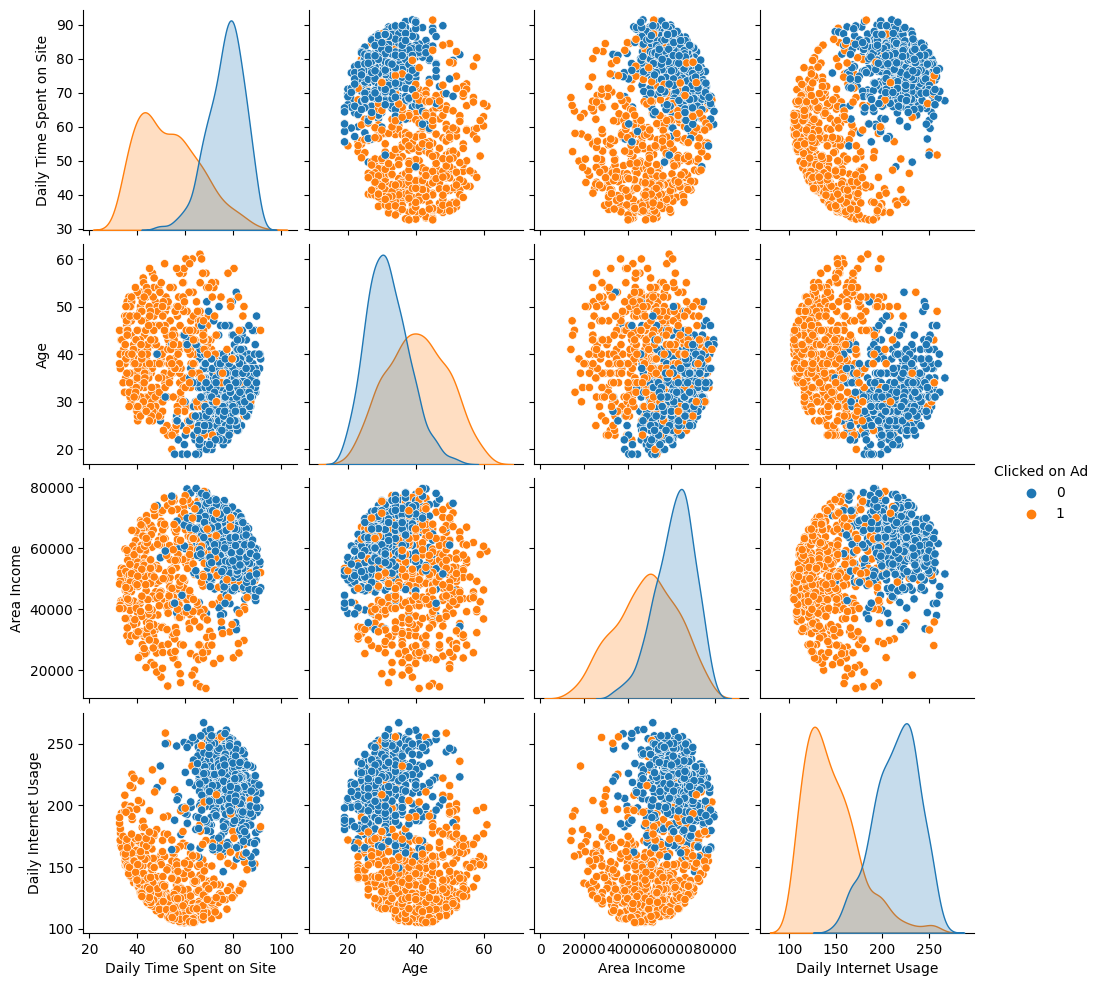

In [92]:
# EDA
sns.pairplot(df, hue='Clicked on Ad',vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'])
plt.show()

### Key Highlights
Users who spends more time on the site and with higher are income do not click on the ads. \
Younger user who spends more time on the site are not do not click on the ads which shows they are not interested in ads.\
User with higher daily internet usage and higher time spent on the site do not click on the ads.

## Outlier Analysis

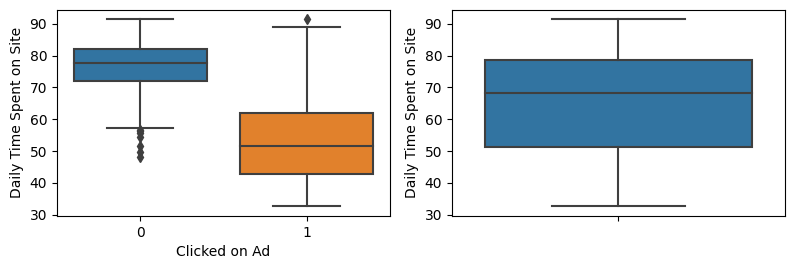

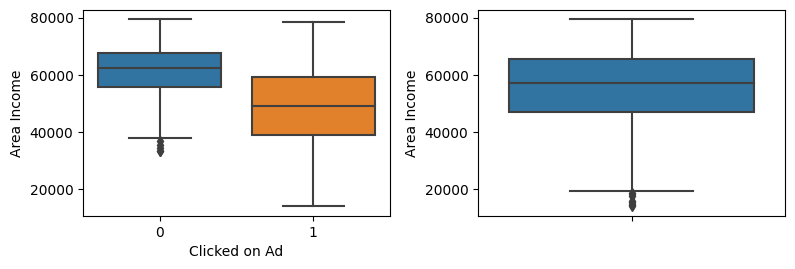

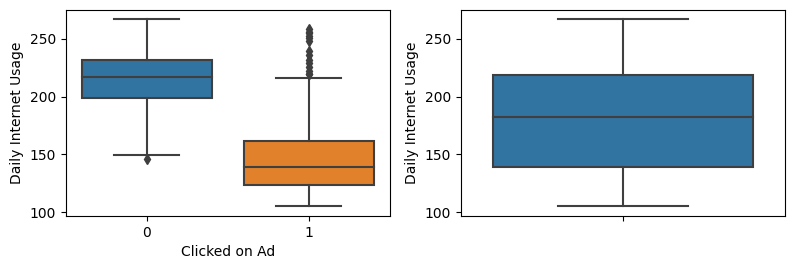

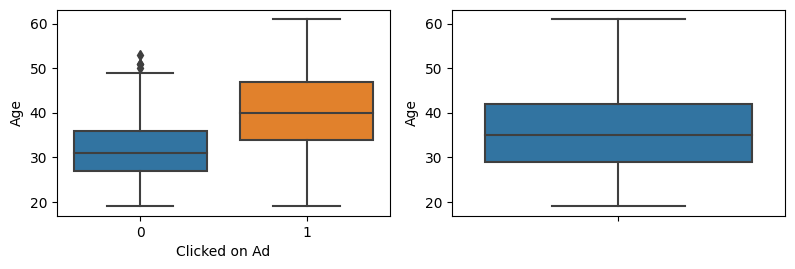

In [97]:
import warnings
warnings.filterwarnings('ignore')
    
plots = ['Daily Time Spent on Site',
         'Area Income','Daily Internet Usage', 'Age']
for i in plots:
    plt.figure(figsize=(12,5))
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df,x = 'Clicked on Ad', y=i)
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df,y=i)
    plt.tight_layout()
    
    plt.show()

No such outlier observed. Area income has some outliers but they seem to be realistic numbers.

## Correlation Analysis

<AxesSubplot:>

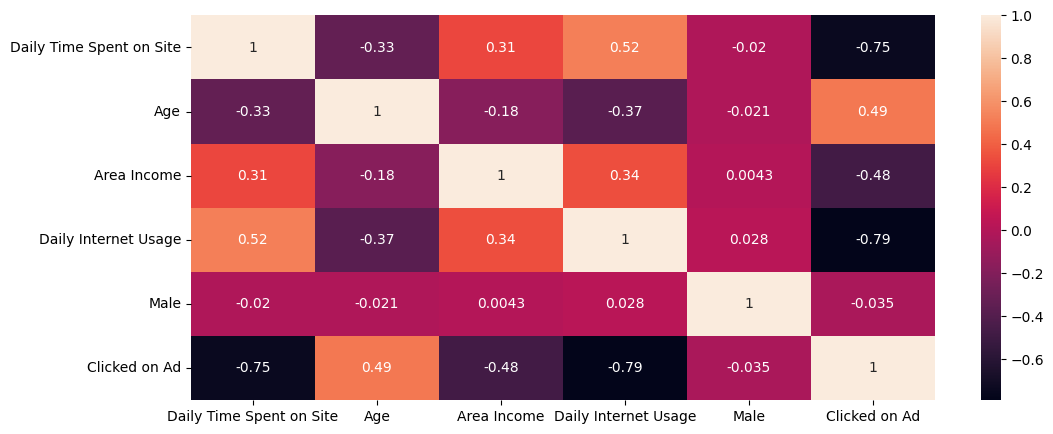

In [96]:
fig = plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

### Key Points
Daily Time Spent on Site is highly correlated with Daily Internet Usage,Are Income,and Age. \
Similarly, target variable is strongly correlated with the daily time spent on site,age,area income,daily internet usage indicating that these features are important for prediction.


In [98]:
import datetime as dt

## Feature Engineering

In [99]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Weekday,Hour
0,68.95,35,61833.90,256.09,0.0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1.0,0,4,4,0,1
2,69.47,26,59785.94,236.50,0.0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1.0,0,1,10,6,2
4,68.37,35,73889.99,225.58,0.0,0,6,3,4,3


In [100]:
df["Month"].value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: Month, dtype: int64

In [101]:
df["Day"].value_counts()

3     46
17    42
15    41
10    37
26    36
4     36
16    35
23    35
5     35
27    35
18    35
8     35
9     34
20    33
24    33
14    33
1     33
11    32
7     32
21    32
28    30
13    30
29    29
12    29
19    29
30    28
2     25
6     25
22    24
25    23
31    18
Name: Day, dtype: int64

In [102]:
df["Weekday"].value_counts()

6    159
2    156
4    155
3    142
0    140
5    126
1    122
Name: Weekday, dtype: int64

In [103]:
df["Hour"].value_counts()

7     54
20    50
9     49
21    48
0     45
23    44
5     44
22    43
14    43
8     43
4     42
13    42
3     42
17    41
18    41
11    40
19    39
6     39
16    39
12    38
2     36
15    35
1     32
10    31
Name: Hour, dtype: int64

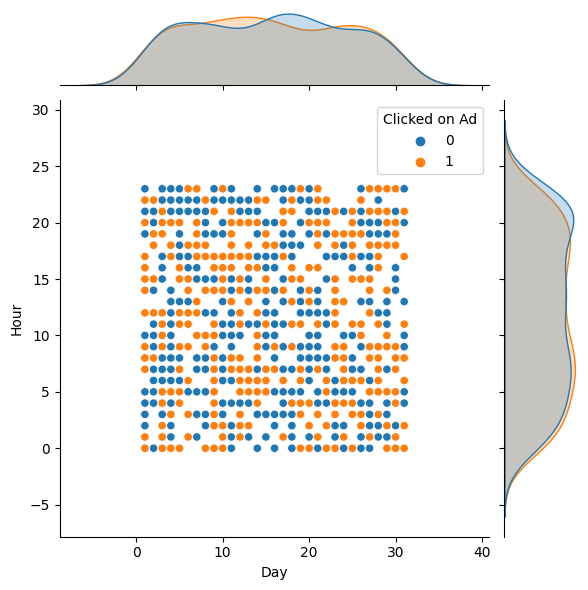

In [104]:
sns.jointplot(x='Day',y='Hour', data=df, hue="Clicked on Ad")

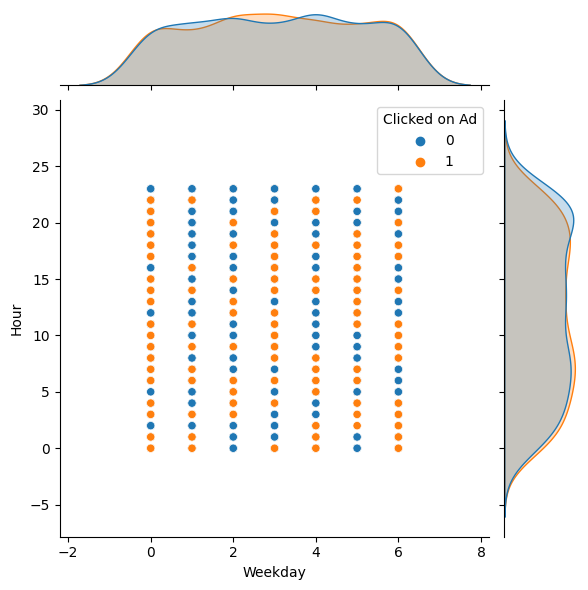

In [105]:
sns.jointplot(x='Weekday',y='Hour', data=df, hue="Clicked on Ad")

Text(0, 0.5, 'value_count')

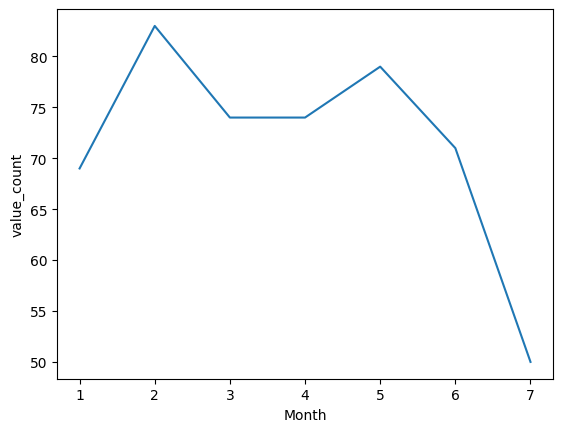

In [112]:
df['Month'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.xlabel("Month")
plt.ylabel("value_count")

Text(0, 0.5, 'value_count')

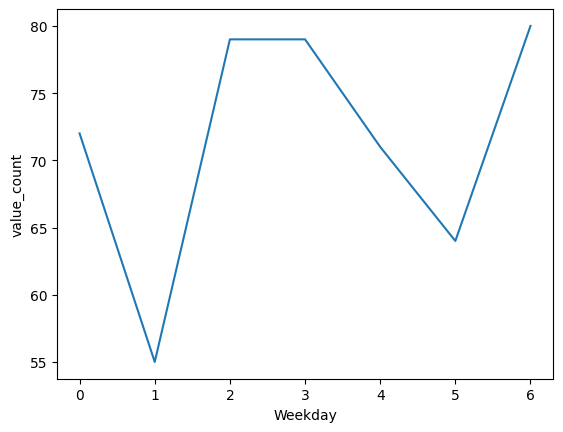

In [110]:
df['Weekday'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.xlabel("Weekday")
plt.ylabel("value_count")

Text(0, 0.5, 'value_count')

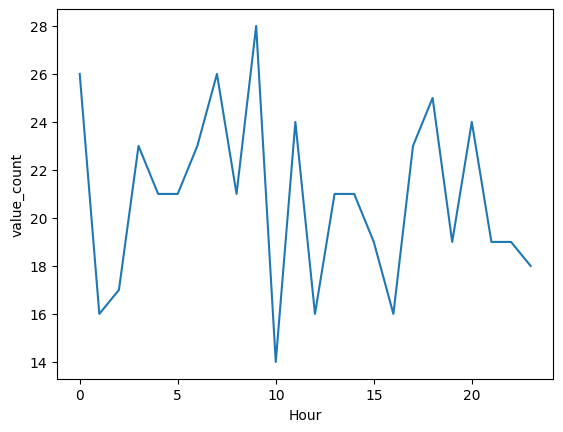

In [111]:
df['Hour'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()
plt.xlabel("Hour")
plt.ylabel("value_count")

In [113]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month', 'Day',
       'Weekday', 'Hour'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    float64
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Day                       1000 non-null   int64  
 8   Weekday                   1000 non-null   int64  
 9   Hour                      1000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 78.2 KB


#### Missing value Imputation

In [115]:
from sklearn.impute import SimpleImputer

#filling null values with the median values
imputer = SimpleImputer()
#using features with only neumeric values 
#since we already decided to drop all the object features in this dataset
df_numeric = df.select_dtypes(exclude='object')
imputed_df = imputer.fit_transform(df_numeric)


In [116]:
imputed_df

array([[6.89500000e+01, 3.50000000e+01, 6.18339000e+04, ...,
        2.70000000e+01, 6.00000000e+00, 0.00000000e+00],
       [8.02300000e+01, 3.10000000e+01, 6.84418500e+04, ...,
        4.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.94700000e+01, 2.60000000e+01, 5.97859400e+04, ...,
        1.30000000e+01, 6.00000000e+00, 2.00000000e+01],
       ...,
       [6.49295238e+01, 5.10000000e+01, 4.24157200e+04, ...,
        1.00000000e+00, 0.00000000e+00, 1.70000000e+01],
       [5.55500000e+01, 1.90000000e+01, 4.19207900e+04, ...,
        2.40000000e+01, 3.00000000e+00, 2.00000000e+00],
       [4.50100000e+01, 2.60000000e+01, 2.98758000e+04, ...,
        3.00000000e+00, 4.00000000e+00, 2.10000000e+01]])

In [117]:
df_train = pd.DataFrame(imputed_df)

In [118]:
df_train

,0,1,2,3,4,5,6,7,8,9
0,68.950000,35.0,61833.90,256.09,0.0,0.0,3.0,27.0,6.0,0.0
1,80.230000,31.0,68441.85,193.77,1.0,0.0,4.0,4.0,0.0,1.0
2,69.470000,26.0,59785.94,236.50,0.0,0.0,3.0,13.0,6.0,20.0
3,74.150000,29.0,54806.18,245.89,1.0,0.0,1.0,10.0,6.0,2.0
4,68.370000,35.0,73889.99,225.58,0.0,0.0,6.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30.0,71384.57,208.58,1.0,1.0,2.0,11.0,3.0,21.0
996,51.300000,45.0,67782.17,134.42,1.0,1.0,4.0,22.0,4.0,2.0
997,64.929524,51.0,42415.72,120.37,1.0,1.0,2.0,1.0,0.0,17.0
998,55.550000,19.0,41920.79,187.95,0.0,0.0,3.0,24.0,3.0,2.0


In [119]:
df_train.columns = df.select_dtypes(exclude='object').columns

In [120]:
numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage']

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#### Scaling numeric features

In [122]:
scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

### Model building and Evaluation

In [125]:
# Train-Test Split
X = df_train.drop('Clicked on Ad', axis=1)
y = df_train['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.9366666666666666
Random Forest Accuracy: 0.95
Gradient Boosting Accuracy: 0.95
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


__Logistic regression performs the best__

In [128]:
# Model Evaluation
rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.95
Precision: 0.954248366013072
Recall: 0.948051948051948
F1 Score: 0.9511400651465798


In [131]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_LR)}')
print(f'Precision: {precision_score(y_test, y_pred_LR)}')
print(f'Recall: {recall_score(y_test, y_pred_LR)}')
print(f'F1 Score: {f1_score(y_test, y_pred_LR)}')

Accuracy: 0.96
Precision: 0.9797297297297297
Recall: 0.9415584415584416
F1 Score: 0.9602649006622517


In [132]:
confusion_matrix = confusion_matrix(y_pred_LR, y_test)
print('\nConfusion Matrix:')
print(confusion_matrix)

print(classification_report(y_test, y_pred_LR))


Confusion Matrix:
[[143   9]
 [  3 145]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       146
         1.0       0.98      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Out of 154 users,which model predicted that they will click on the ads,145 of them actually clicked on the ads and 9 didnt clicked on the ads\
Model predicted that 146 user would not click on the ads,143 out of them actually didnt clicked on the ads while 3 clicked on the ads 


<BarContainer object of 9 artists>

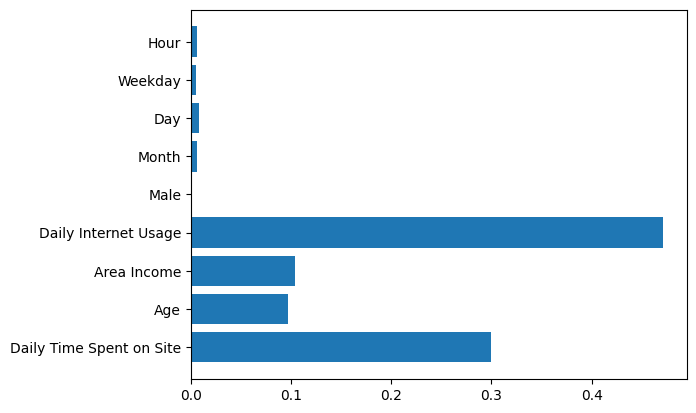

In [137]:
plt.barh(X_train.columns, rf.feature_importances_)

In [134]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Weekday,Hour
541,0.681384,0.340615,0.677444,1.560248,1.0,5.0,30.0,0.0,2.0
440,-1.200601,-0.456545,0.788220,-0.732549,0.0,5.0,30.0,0.0,20.0
482,0.285410,-1.253706,0.810043,0.768616,0.0,2.0,13.0,5.0,4.0
422,-0.734077,-0.114905,0.436302,-1.371450,1.0,3.0,30.0,2.0,1.0
778,-0.779204,0.910016,-3.012619,0.261348,0.0,5.0,19.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
106,0.464011,-1.253706,-0.631126,1.402702,1.0,7.0,5.0,1.0,17.0
270,-1.299117,1.934936,0.608401,-0.272063,1.0,4.0,23.0,5.0,6.0
860,1.680532,1.023896,-0.229303,0.063899,1.0,4.0,1.0,4.0,7.0
435,-0.525603,0.682255,1.326564,-0.927476,0.0,2.0,20.0,5.0,10.0


In [140]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [139]:
model_fi = permutation_importance(LR,X_train, y_train)
model_fi['importances_mean'] 

array([ 0.14028571,  0.02771429,  0.04257143,  0.19742857, -0.00028571,
        0.00285714,  0.00742857,  0.002     ,  0.        ])

In [142]:
X_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Month', 'Day', 'Weekday', 'Hour'],
      dtype='object')

### Feature Importance

Feature: 0, Score: -2.37055
Feature: 1, Score: 1.15213
Feature: 2, Score: -1.46402
Feature: 3, Score: -2.69674
Feature: 4, Score: -0.32627
Feature: 5, Score: 0.14562
Feature: 6, Score: -0.03991
Feature: 7, Score: 0.15047
Feature: 8, Score: 0.00089


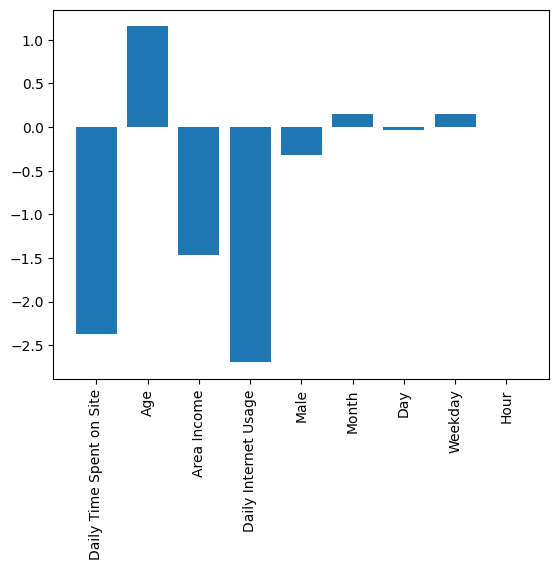

In [148]:
# get importance
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in X_train.columns], importance)
pyplot.xticks(rotation=90)
pyplot.show()


In [144]:
importance

array([-2.37054858e+00,  1.15213215e+00, -1.46401587e+00, -2.69673955e+00,
       -3.26268293e-01,  1.45615912e-01, -3.99092405e-02,  1.50468649e-01,
        8.89503794e-04])